In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm



# step1 데이터 구성하기

In [4]:
df = pd.read_csv("직무능력평가.csv", engine='python')
df

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47
5,43,55,49,44,54,49,34
6,58,67,42,56,66,68,35
7,71,75,50,55,70,66,41
8,72,82,72,67,71,83,31
9,67,61,45,47,62,80,41


In [8]:
df_x = df.drop('EVAL', axis=1)
df_y = df['EVAL']
df_x

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47
5,55,49,44,54,49,34
6,67,42,56,66,68,35
7,75,50,55,70,66,41
8,82,72,67,71,83,31
9,61,45,47,62,80,41


In [9]:
df_y


0     43
1     63
2     71
3     61
4     81
5     43
6     58
7     71
8     72
9     67
10    64
11    67
12    69
13    68
14    77
15    81
16    74
17    65
18    65
19    50
20    50
21    64
22    53
23    40
24    63
25    66
26    78
27    48
28    85
29    82
Name: EVAL, dtype: int64

# step2 선형관계 확인 : 산점도 및 상관계수

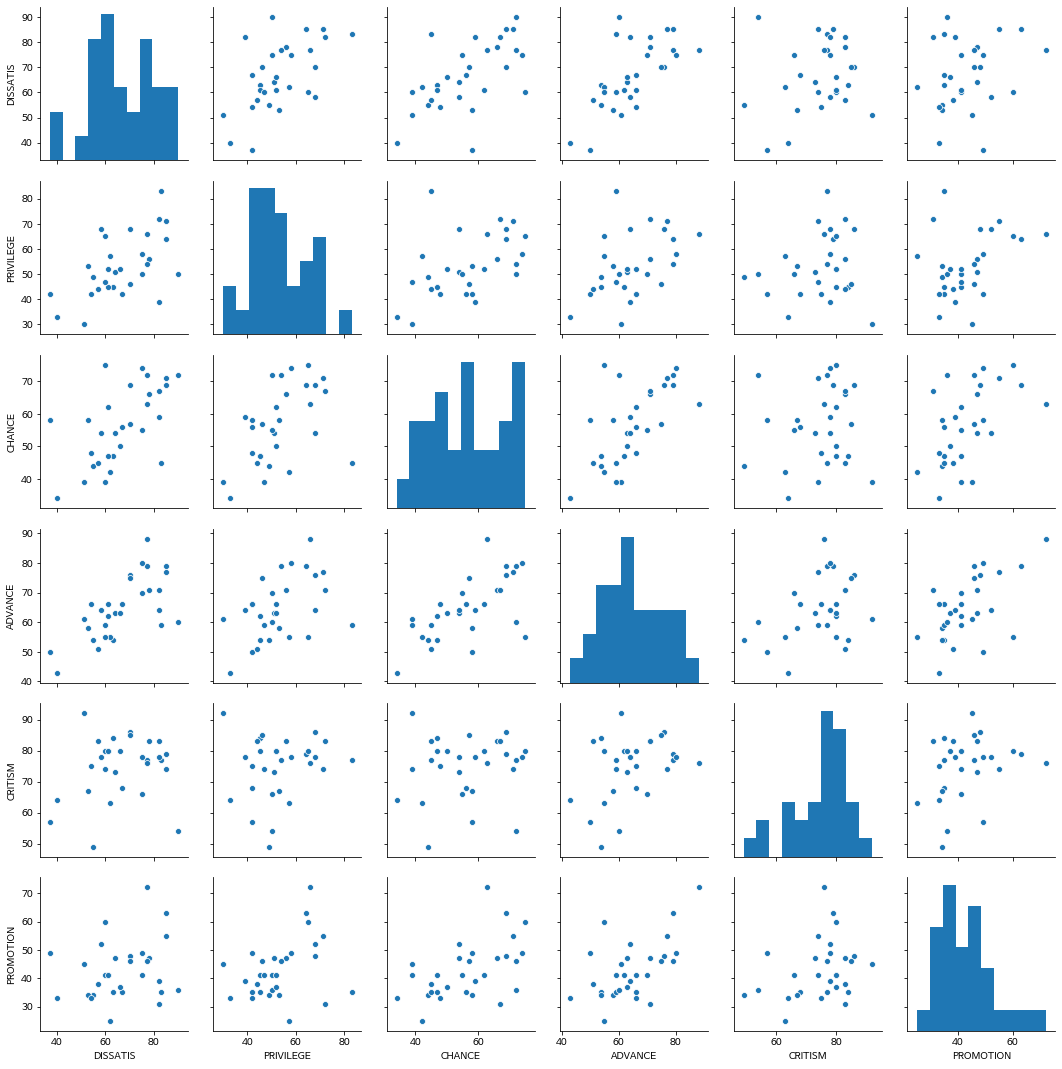

In [10]:
sns.pairplot(df_x)

In [11]:
df_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


# step3 데이터 확인 및 scaling

In [17]:
df_x.describe().round(3)
x_cols = df_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_x)
print("Scaled Data: \n", nd_scaled[:5].round(3))
print("Shape : ", nd_scaled.shape)

Scaled Data: 
 [[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape :  (30, 6)


In [22]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [20]:
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


# step4 주성분분석

In [23]:
pca = PCA(n_components=6)
nd_pca = pca.fit_transform(df_scaled)
print("PCA DATA:", nd_pca[:5])

PCA DATA: [[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]


In [24]:
print("Shape:", nd_pca.shape)

Shape: (30, 6)


In [25]:
df_pca = pd.DataFrame(nd_pca, columns=["Prin1", "Prin2", "Prin3", "Prin4", "Prin5", "Prin6"])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


# 주성분 분석 및 결과 : 고유값(Eigenvalue) 확인 및 주성분 개수 결정

In [27]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [i for i in range(1,7)]
df_pca_stat["EigenValues"] = pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


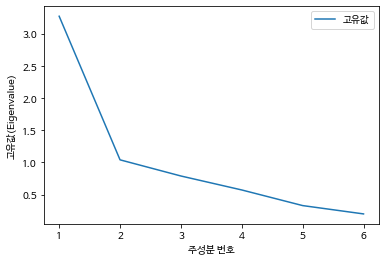

In [28]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], label="고유값")
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")



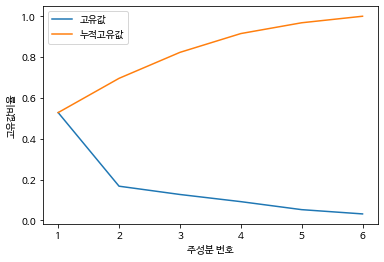

In [29]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"], label="고유값")
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["CumEigenValueRatio"], label="누적고유값")
plt.ylabel("고유값비율")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

# 주성분 분석 및 결과 : 고유벡터의 확인 및 해석

In [32]:
x_cols = pd.DataFrame({"Feature":df_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1, columns =["Prin1", "Prin2", "Prin3", "Prin4", "Prin5", "Prin6"])],axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


# step 5 주성분 상관 /회귀분석 : 상관관계

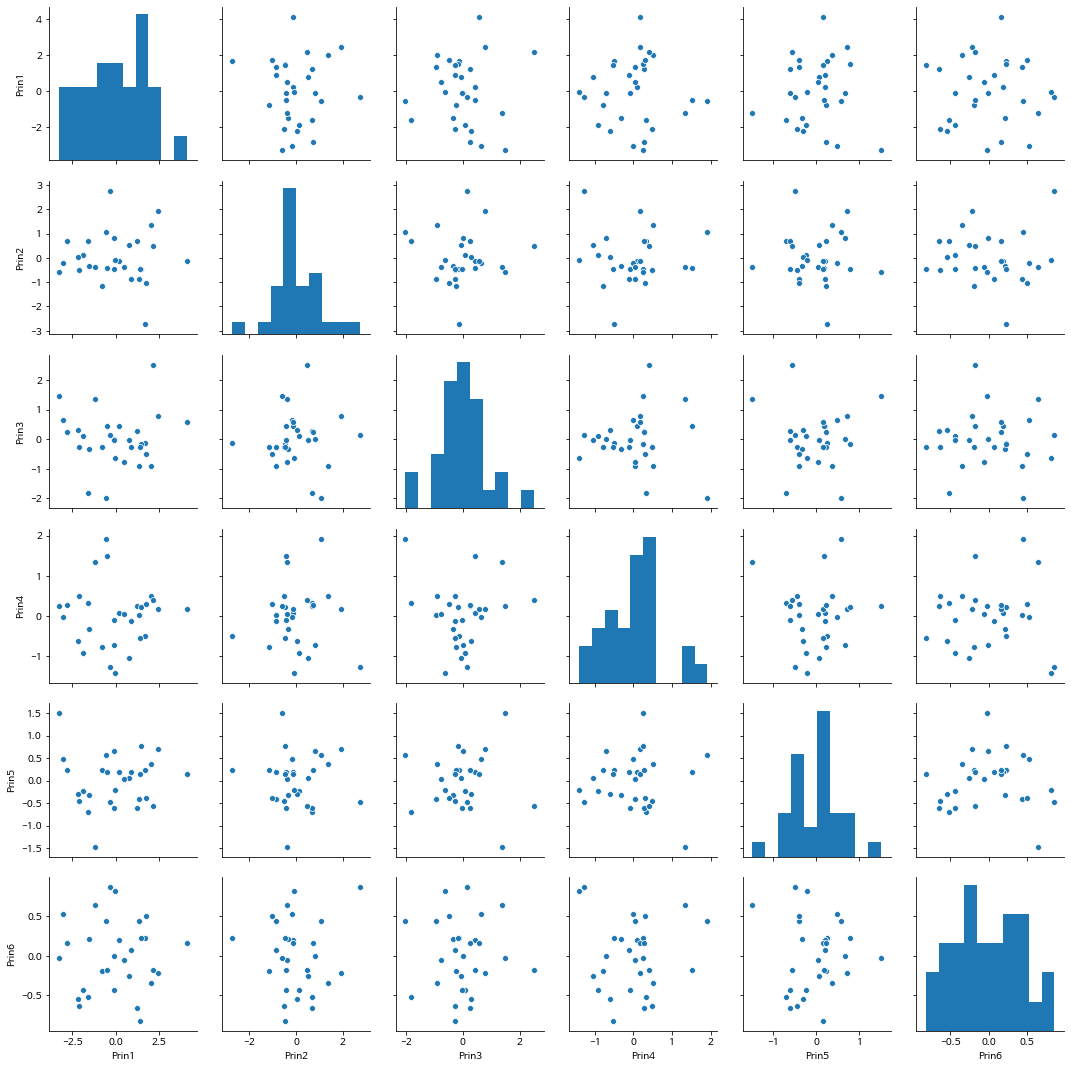

In [33]:
sns.pairplot(df_pca)


In [34]:
df_pca.corr().round(3)


,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,-0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,-0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,-0.0,-0.0
Prin5,-0.0,-0.0,0.0,-0.0,1.0,-0.0
Prin6,0.0,0.0,-0.0,-0.0,-0.0,1.0


# step 5 주성분 상관 /회귀분석 : 회귀분석

In [35]:
df_x_const = sm.add_constant(df_x)
reg_model = sm.OLS(df_y, df_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())



                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           1.24e-05
Time:                        15:49:02   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [37]:
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           1.24e-05
Time:                        15:50:11   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.290     50.087      0.0

In [38]:
x_var = ["Prin1", "Prin2", "Prin3"]
df_pca_const = sm.add_constant(df_pca[x_var])
reg_model = sm.OLS(df_y, df_pca_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           1.02e-05
Time:                        15:51:31   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# 주성분 분석(PCA) 실습

# step 1 데이터구성하기

In [40]:
df = pd.read_csv("IRIS.csv", engine='python')
df

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [41]:
df_x = df.drop("SPECIES", axis=1)
df_y = df["SPECIES"]
df_x

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [42]:
df_y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: SPECIES, Length: 150, dtype: object

# step2 선형관계 확인 : 산점도 행렬, 상관계수

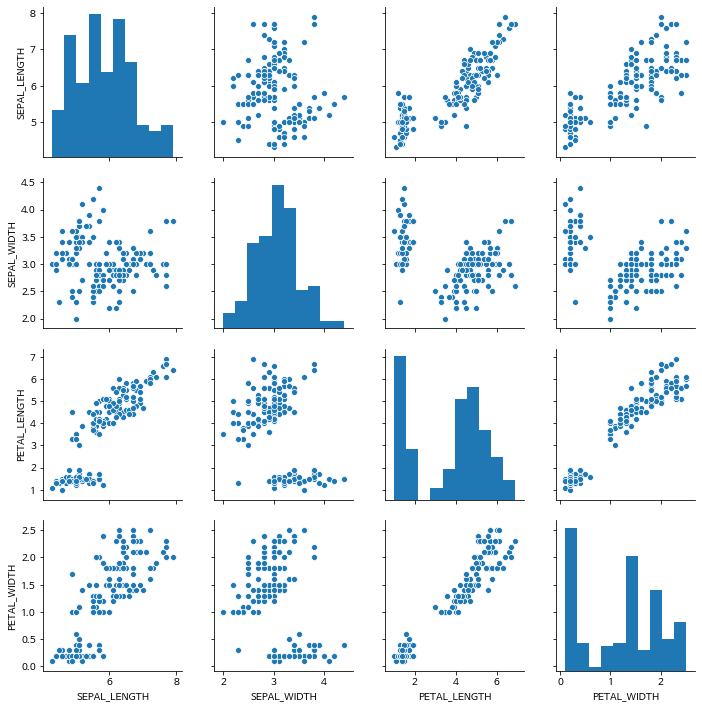

In [43]:
sns.pairplot(df_x)

In [44]:
df_x.corr().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000,-0.118,0.872,0.818
SEPAL_WIDTH,-0.118,1.000,-0.428,-0.366
PETAL_LENGTH,0.872,-0.428,1.000,0.963
PETAL_WIDTH,0.818,-0.366,0.963,1.000


# step3 데이터 확인 및 scaling

In [45]:
df_x.describe().round(3)


,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [46]:
x_cols = df_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_x)
print("Scaled Data: \n", nd_scaled[:5].round(3))
print("Shape : ", nd_scaled.shape)

Scaled Data: 
 [[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
Shape :  (150, 4)


In [47]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,-0.901,1.019,-1.340,-1.315
1,-1.143,-0.132,-1.340,-1.315
2,-1.385,0.328,-1.397,-1.315
3,-1.507,0.098,-1.283,-1.315
4,-1.022,1.249,-1.340,-1.315


In [48]:
df_scaled.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


# step4 주성분분석

In [60]:
pca = PCA(n_components=4)
nd_pca = pca.fit_transform(df_scaled)
nd_pca
print("PCA DATA:", nd_pca[:7])

PCA DATA: [[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]
 [-2.29938422 -0.59739451  0.09129011  0.06595556]
 [-2.38984217  0.64683538  0.0157382   0.03592281]
 [-2.07563095  1.48917752  0.02696829 -0.00660818]
 [-2.44402884  0.0476442   0.3354704   0.03677556]]


In [54]:
print("Shape:", nd_pca.shape)

Shape: (150, 4)


In [58]:
df_pca = pd.DataFrame(nd_pca, columns=["Prin1", "Prin2", "Prin3", "Prin4"])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,Prin1,Prin2,Prin3,Prin4
0,-0.900681,1.019004,-1.340227,-1.315444,-2.264703,0.480027,-0.127706,-0.024168
1,-1.143017,-0.131979,-1.340227,-1.315444,-2.080961,-0.674134,-0.234609,-0.103007
2,-1.385353,0.328414,-1.397064,-1.315444,-2.364229,-0.341908,0.044201,-0.028377
3,-1.506521,0.098217,-1.283389,-1.315444,-2.299384,-0.597395,0.091290,0.065956
4,-1.021849,1.249201,-1.340227,-1.315444,-2.389842,0.646835,0.015738,0.035923


# 주성분 분석 및 결과 : 고유값(Eigenvalue) 확인 및 주성분 개수 결정

In [61]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [i for i in range(1,5)]
df_pca_stat["EigenValues"] = pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,2.938,0.730,0.730
1,2,0.920,0.229,0.958
2,3,0.148,0.037,0.995
3,4,0.021,0.005,1.000


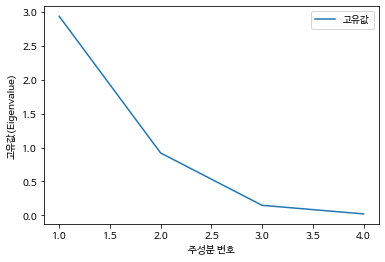

In [62]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], label="고유값")
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")



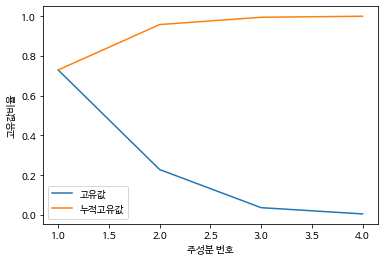

In [63]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"], label="고유값")
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["CumEigenValueRatio"], label="누적고유값")
plt.ylabel("고유값비율")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

# 주성분 분석 및 결과 : 고유벡터의 확인 및 해석

In [67]:
x_cols = pd.DataFrame({"Feature":df_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1, columns =["Prin1", "Prin2", "Prin3", "Prin4"])],axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4
0,SEPAL_LENGTH,-0.521,-0.377,0.720,0.261
1,SEPAL_WIDTH,0.269,-0.923,-0.244,-0.124
2,PETAL_LENGTH,-0.580,-0.024,-0.142,-0.801
3,PETAL_WIDTH,-0.565,-0.067,-0.634,0.524


# step 5 주성분 상관 /회귀분석 : 상관관계

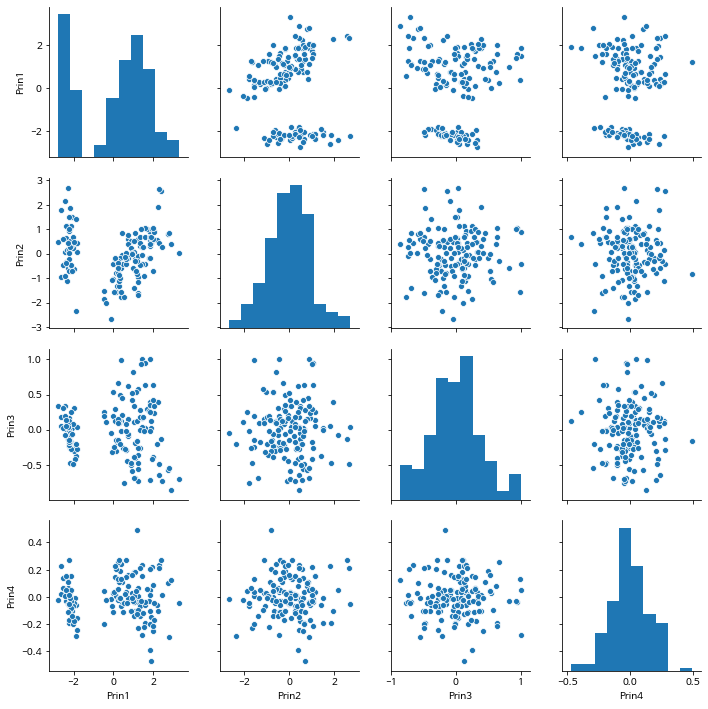

In [68]:
sns.pairplot(df_pca)


In [69]:
df_pca.corr().round(3)


,Prin1,Prin2,Prin3,Prin4
Prin1,1.0,0.0,-0.0,-0.0
Prin2,0.0,1.0,-0.0,-0.0
Prin3,-0.0,-0.0,1.0,-0.0
Prin4,-0.0,-0.0,-0.0,1.0
